# Demo Matplotlib

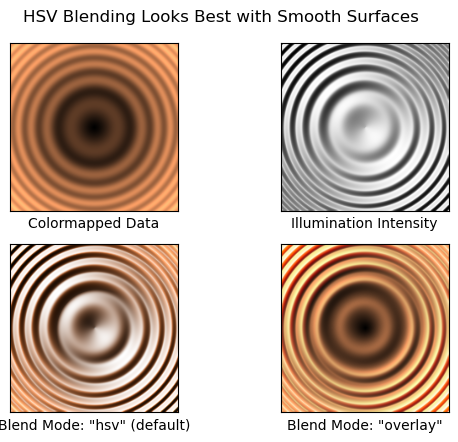

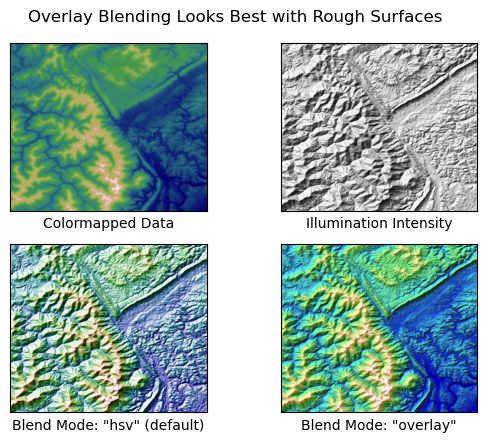

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook
from matplotlib.colors import LightSource


def main():
    # Test data
    x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
    z = 5 * (np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2))

    dem = cbook.get_sample_data('jacksboro_fault_dem.npz')
    elev = dem['elevation']

    fig = compare(z, plt.cm.copper)
    fig.suptitle('HSV Blending Looks Best with Smooth Surfaces', y=0.95)

    fig = compare(elev, plt.cm.gist_earth, ve=0.05)
    fig.suptitle('Overlay Blending Looks Best with Rough Surfaces', y=0.95)

    plt.show()


def compare(z, cmap, ve=1):
    # Create subplots and hide ticks
    fig, axs = plt.subplots(ncols=2, nrows=2)
    for ax in axs.flat:
        ax.set(xticks=[], yticks=[])

    # Illuminate the scene from the northwest
    ls = LightSource(azdeg=315, altdeg=45)

    axs[0, 0].imshow(z, cmap=cmap)
    axs[0, 0].set(xlabel='Colormapped Data')

    axs[0, 1].imshow(ls.hillshade(z, vert_exag=ve), cmap='gray')
    axs[0, 1].set(xlabel='Illumination Intensity')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='hsv')
    axs[1, 0].imshow(rgb)
    axs[1, 0].set(xlabel='Blend Mode: "hsv" (default)')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='overlay')
    axs[1, 1].imshow(rgb)
    axs[1, 1].set(xlabel='Blend Mode: "overlay"')

    return fig


main()

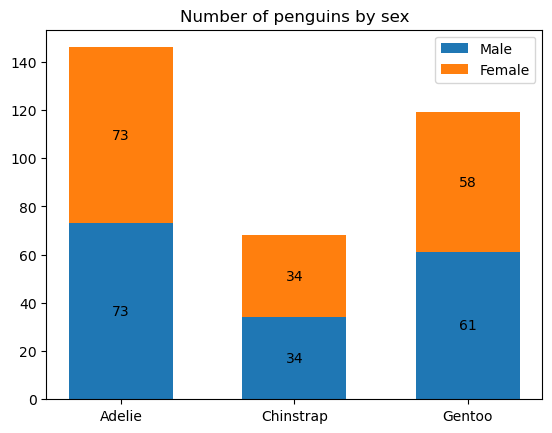

In [3]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

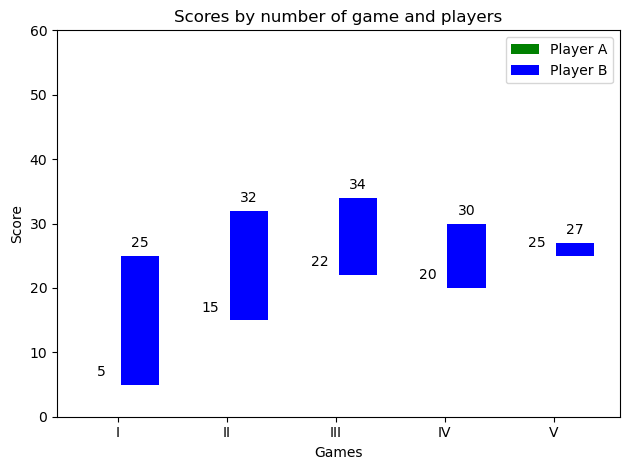

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()

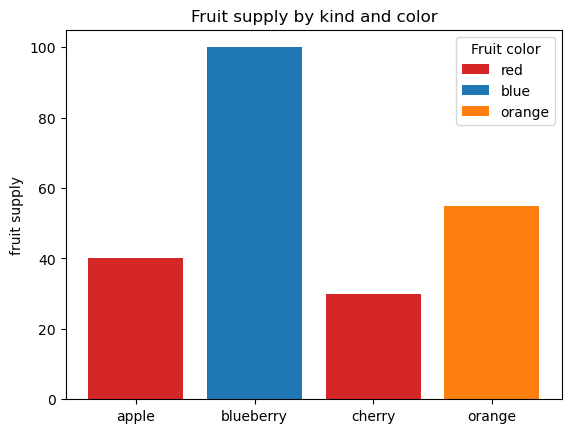

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

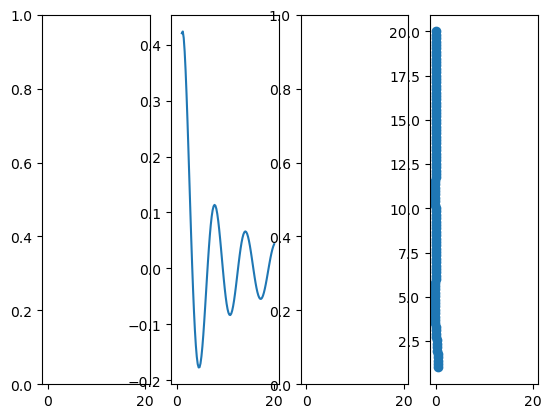

In [41]:
x = np.linspace(1, 20, 100)
y = np.sin(x) / (1 + x)

fig, ax = plt.subplots(1, 4, sharex=True)

ax[1].plot(x, y)
ax[3].scatter(y, x)

plt.show()

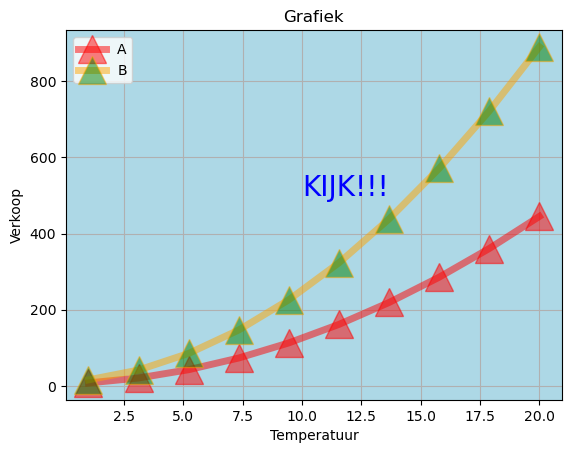

In [74]:
x = np.linspace(1, 20, 10)
y = x ** 2 + 2 * x + 5

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, color='red', linewidth=5, marker='^', markersize=20, label='A', alpha=0.5)
ax.plot(x, 2 * y, color='orange', linewidth=5, marker='^', markersize=20, label='B', alpha=0.5, markerfacecolor='green')
ax.grid()
ax.legend()
ax.set_title('Grafiek')
ax.set_xlabel('Temperatuur')
ax.set_ylabel('Verkoop')

ax.set_facecolor('lightblue')

ax.text(10, 500, 'KIJK!!!', fontsize=20, color='blue')

plt.show()

In [80]:
data = np.random.randn(100).reshape(2, -1)

In [84]:
data[1]

array([ 0.89565315, -0.16700095,  0.8472549 , -0.20562954,  1.13045973,
       -0.54671879, -0.17830839, -0.04149339, -0.6220913 , -0.08263753,
        0.06444498,  0.52424879,  1.54586462, -0.69333284, -0.0755681 ,
        1.70134917, -0.82254231, -0.90559246,  0.0682113 , -0.50678646,
        2.52531677, -0.34412955,  0.25360623,  1.08865371, -0.5874926 ,
        1.1986659 , -0.94404763, -1.57609427,  0.73248868, -0.88586571,
       -1.55603416, -0.15535394,  0.76292145, -1.73740175, -1.01476016,
        0.30598937,  0.76967778,  1.91326792,  0.02557364, -0.09676783,
       -0.78115303,  0.12187616,  1.03953263,  0.12807542,  1.16423563,
        0.30728137, -1.13533721, -0.08137193, -0.30259697, -0.77338515])

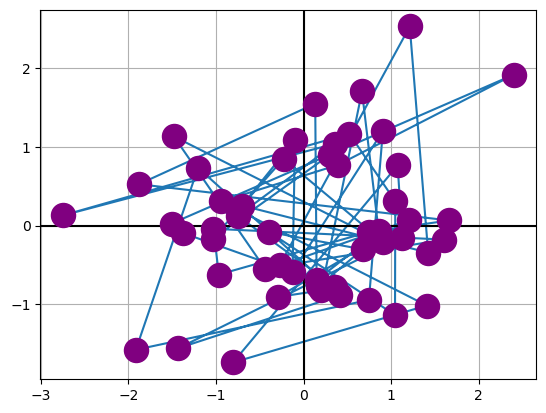

In [111]:
fig, ax = plt.subplots(1, 1)

ax.grid()
ax.plot(data[0], data[1], zorder=2)
ax.scatter(data[0], data[1], s=300, color='purple', zorder=3)
ax.axhline(0, color='black')
ax.axvline(0, color='black')

plt.show()

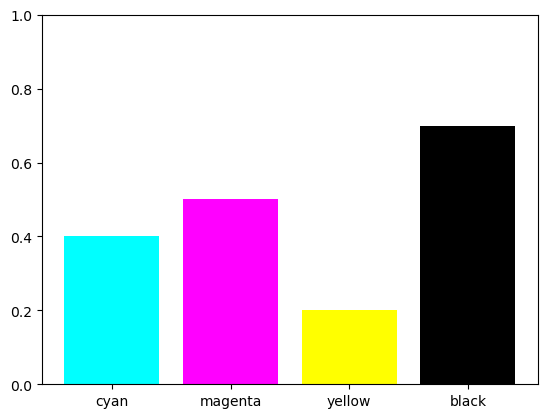

In [114]:
kleuren = ['cyan', 'magenta', 'yellow', 'black']
levels = [0.4, 0.5, 0.2, 0.7]

fig, ax = plt.subplots(1, 1)

ax.bar(kleuren, levels, color=kleuren)

ax.set_ylim(0, 1)

plt.show()

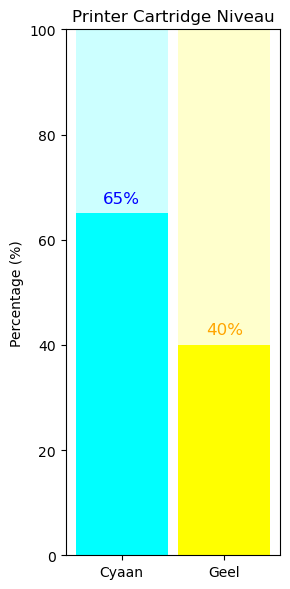

In [127]:
# Stel cartridge niveaus in (%)

colors = ["cyan", "yellow"]
color_names = ['Cyaan', 'Geel']
levels = [65, 40]
# niveau_cyaan = 65
# niveau_geel = 40

fig, ax = plt.subplots(figsize=(3,6))

# Volledige staven (100%)
ax.bar(color_names, [100,100], color=colors, alpha=0.2, width=0.9)

# Gevulde delen
ax.bar(color_names, levels, color=colors, width=0.9)

# Labels en opmaak
ax.set_ylim(0, 100)
# ax.set_xticks([0,1])
# ax.set_xticklabels(["Cyaan","Geel"])
ax.set_ylabel("Percentage (%)")
ax.set_title("Printer Cartridge Niveau")

# Waarden boven de staven
ax.text(0, niveau_cyaan+2, f"{niveau_cyaan}%", ha="center", color="blue", fontsize=12)
ax.text(1, niveau_geel+2, f"{niveau_geel}%", ha="center", color="orange", fontsize=12)

plt.tight_layout()

plt.show()